In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/filestranslated/items-translated.csv
/kaggle/input/filestranslated/shops-translated.csv
/kaggle/input/filestranslated/categories_translated.csv
/kaggle/input/competitive-data-science-predict-future-sales/items.csv
/kaggle/input/competitive-data-science-predict-future-sales/sample_submission.csv
/kaggle/input/competitive-data-science-predict-future-sales/item_categories.csv
/kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv
/kaggle/input/competitive-data-science-predict-future-sales/shops.csv
/kaggle/input/competitive-data-science-predict-future-sales/test.csv


In [2]:
item_categories=pd.read_csv("../input/competitive-data-science-predict-future-sales/item_categories.csv")
items=pd.read_csv("../input/competitive-data-science-predict-future-sales/items.csv")
sales_train=pd.read_csv("../input/competitive-data-science-predict-future-sales/items.csv")
shops=pd.read_csv("../input/competitive-data-science-predict-future-sales/shops.csv")
test=pd.read_csv("../input/competitive-data-science-predict-future-sales/test.csv")

In [3]:
items

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


In [4]:
shops_t = pd.read_csv("../input/filestranslated/shops-translated.csv")
items_t = pd.read_csv("../input/filestranslated/items-translated.csv")
item_categories_t = pd.read_csv("../input/filestranslated/categories_translated.csv")

In [5]:
items_t

,item_id,item_name_translated
0,0,!! IN THE POWER OF HAPPINESS (PLAST) D
1,1,! ABBYY FineReader 12 Professional Edition Ful...
2,2,*** IN THE GLORY OF THE GLORY (UNV) D
3,3,*** BLUE WAVE (Univ) D
4,4,*** BOX (GLASS) D
...,...,...
22165,22165,"Nuclear Titbit 2 [PC, Digital Version]"
22166,22166,Query language 1C: Enterprise [Digital version]
22167,22167,The query language is 1C: Enterprise 8 (+ CD)....
22168,22168,Egg for Little Inu


In [6]:
del items["item_name"]
items=items.merge(items_t,how="left",on="item_id")
items.rename(columns={'item_name_translated':'item_name'}, inplace=True)

In [7]:
items#transleted

,item_id,item_category_id,item_name
0,0,40,!! IN THE POWER OF HAPPINESS (PLAST) D
1,1,76,! ABBYY FineReader 12 Professional Edition Ful...
2,2,40,*** IN THE GLORY OF THE GLORY (UNV) D
3,3,40,*** BLUE WAVE (Univ) D
4,4,40,*** BOX (GLASS) D
...,...,...,...
22165,22165,31,"Nuclear Titbit 2 [PC, Digital Version]"
22166,22166,54,Query language 1C: Enterprise [Digital version]
22167,22167,49,The query language is 1C: Enterprise 8 (+ CD)....
22168,22168,62,Egg for Little Inu


In [8]:
# item categories

del item_categories_t['Unnamed: 0']
item_categories = item_categories_t

In [9]:
item_categories

,item_category_name,item_category_id
0,PC - Headsets / Headphones,0
1,Accessories - PS2,1
2,Accessories - PS3,2
3,Accessories - PS4,3
4,Accessories - PSP,4
...,...,...
79,Service,79
80,Service - Tickets,80
81,Blank media (spire),81
82,Blank media (piece),82


In [10]:
#shops
shops_t.rename(columns={'shop_name_translated':'shop_name'}, inplace=True)
shops = shops_t

In [11]:
item_categories

,item_category_name,item_category_id
0,PC - Headsets / Headphones,0
1,Accessories - PS2,1
2,Accessories - PS3,2
3,Accessories - PS4,3
4,Accessories - PSP,4
...,...,...
79,Service,79
80,Service - Tickets,80
81,Blank media (spire),81
82,Blank media (piece),82


In [12]:
#a defination to describe about the data 
def eda(i) :
    print('rows and columns:', i.shape, '\n')
    print(i.info(), '\n')
    print(i.count(), '\n')
    print('missing values:\n', i.isna().sum())
    


In [13]:
eda(items)

rows and columns: (22170, 3) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_id           22170 non-null  int64 
 1   item_category_id  22170 non-null  int64 
 2   item_name         22170 non-null  object
dtypes: int64(2), object(1)
memory usage: 692.8+ KB
None 

item_id             22170
item_category_id    22170
item_name           22170
dtype: int64 

missing values:
 item_id             0
item_category_id    0
item_name           0
dtype: int64


In [14]:
eda(shops)

rows and columns: (60, 2) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_id    60 non-null     int64 
 1   shop_name  60 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None 

shop_id      60
shop_name    60
dtype: int64 

missing values:
 shop_id      0
shop_name    0
dtype: int64


In [15]:
eda(sales_train)

rows and columns: (22170, 3) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB
None 

item_name           22170
item_id             22170
item_category_id    22170
dtype: int64 

missing values:
 item_name           0
item_id             0
item_category_id    0
dtype: int64


In [16]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Headsets / Headphones,0
1,Accessories - PS2,1
2,Accessories - PS3,2
3,Accessories - PS4,3
4,Accessories - PSP,4


In [17]:
mergeddata=items.merge(item_categories, on='item_category_id')
mergeddata

,item_id,item_category_id,item_name,item_category_name
0,0,40,!! IN THE POWER OF HAPPINESS (PLAST) D,Movie - DVD
1,2,40,*** IN THE GLORY OF THE GLORY (UNV) D,Movie - DVD
2,3,40,*** BLUE WAVE (Univ) D,Movie - DVD
3,4,40,*** BOX (GLASS) D,Movie - DVD
4,5,40,*** NEW AMERICAN GRAPHICS (UNI) D,Movie - DVD
...,...,...,...,...
22165,22095,83,Power supply GP 15AU (LR6) - Blister 2 pcs Ultra,Batteries
22166,22096,83,Power supply GP 24A (LR03) - Blister 2 pcs,Batteries
22167,22097,83,Power supply GP 24AU (LR03) - Blister 2 pcs Ultra,Batteries
22168,22098,83,Power supply COSMOS LR03 2 * BL,Batteries


In [18]:
#eda(mergeddata)
mergeddata['item_name'].describe()

count                            22170
unique                           22149
top       Hail, I'm your aunt (region)
freq                                 2
Name: item_name, dtype: object

(array([    0,     1,     2, ..., 22146, 22147, 22148]),
 <a list of 22149 Text major ticklabel objects>)

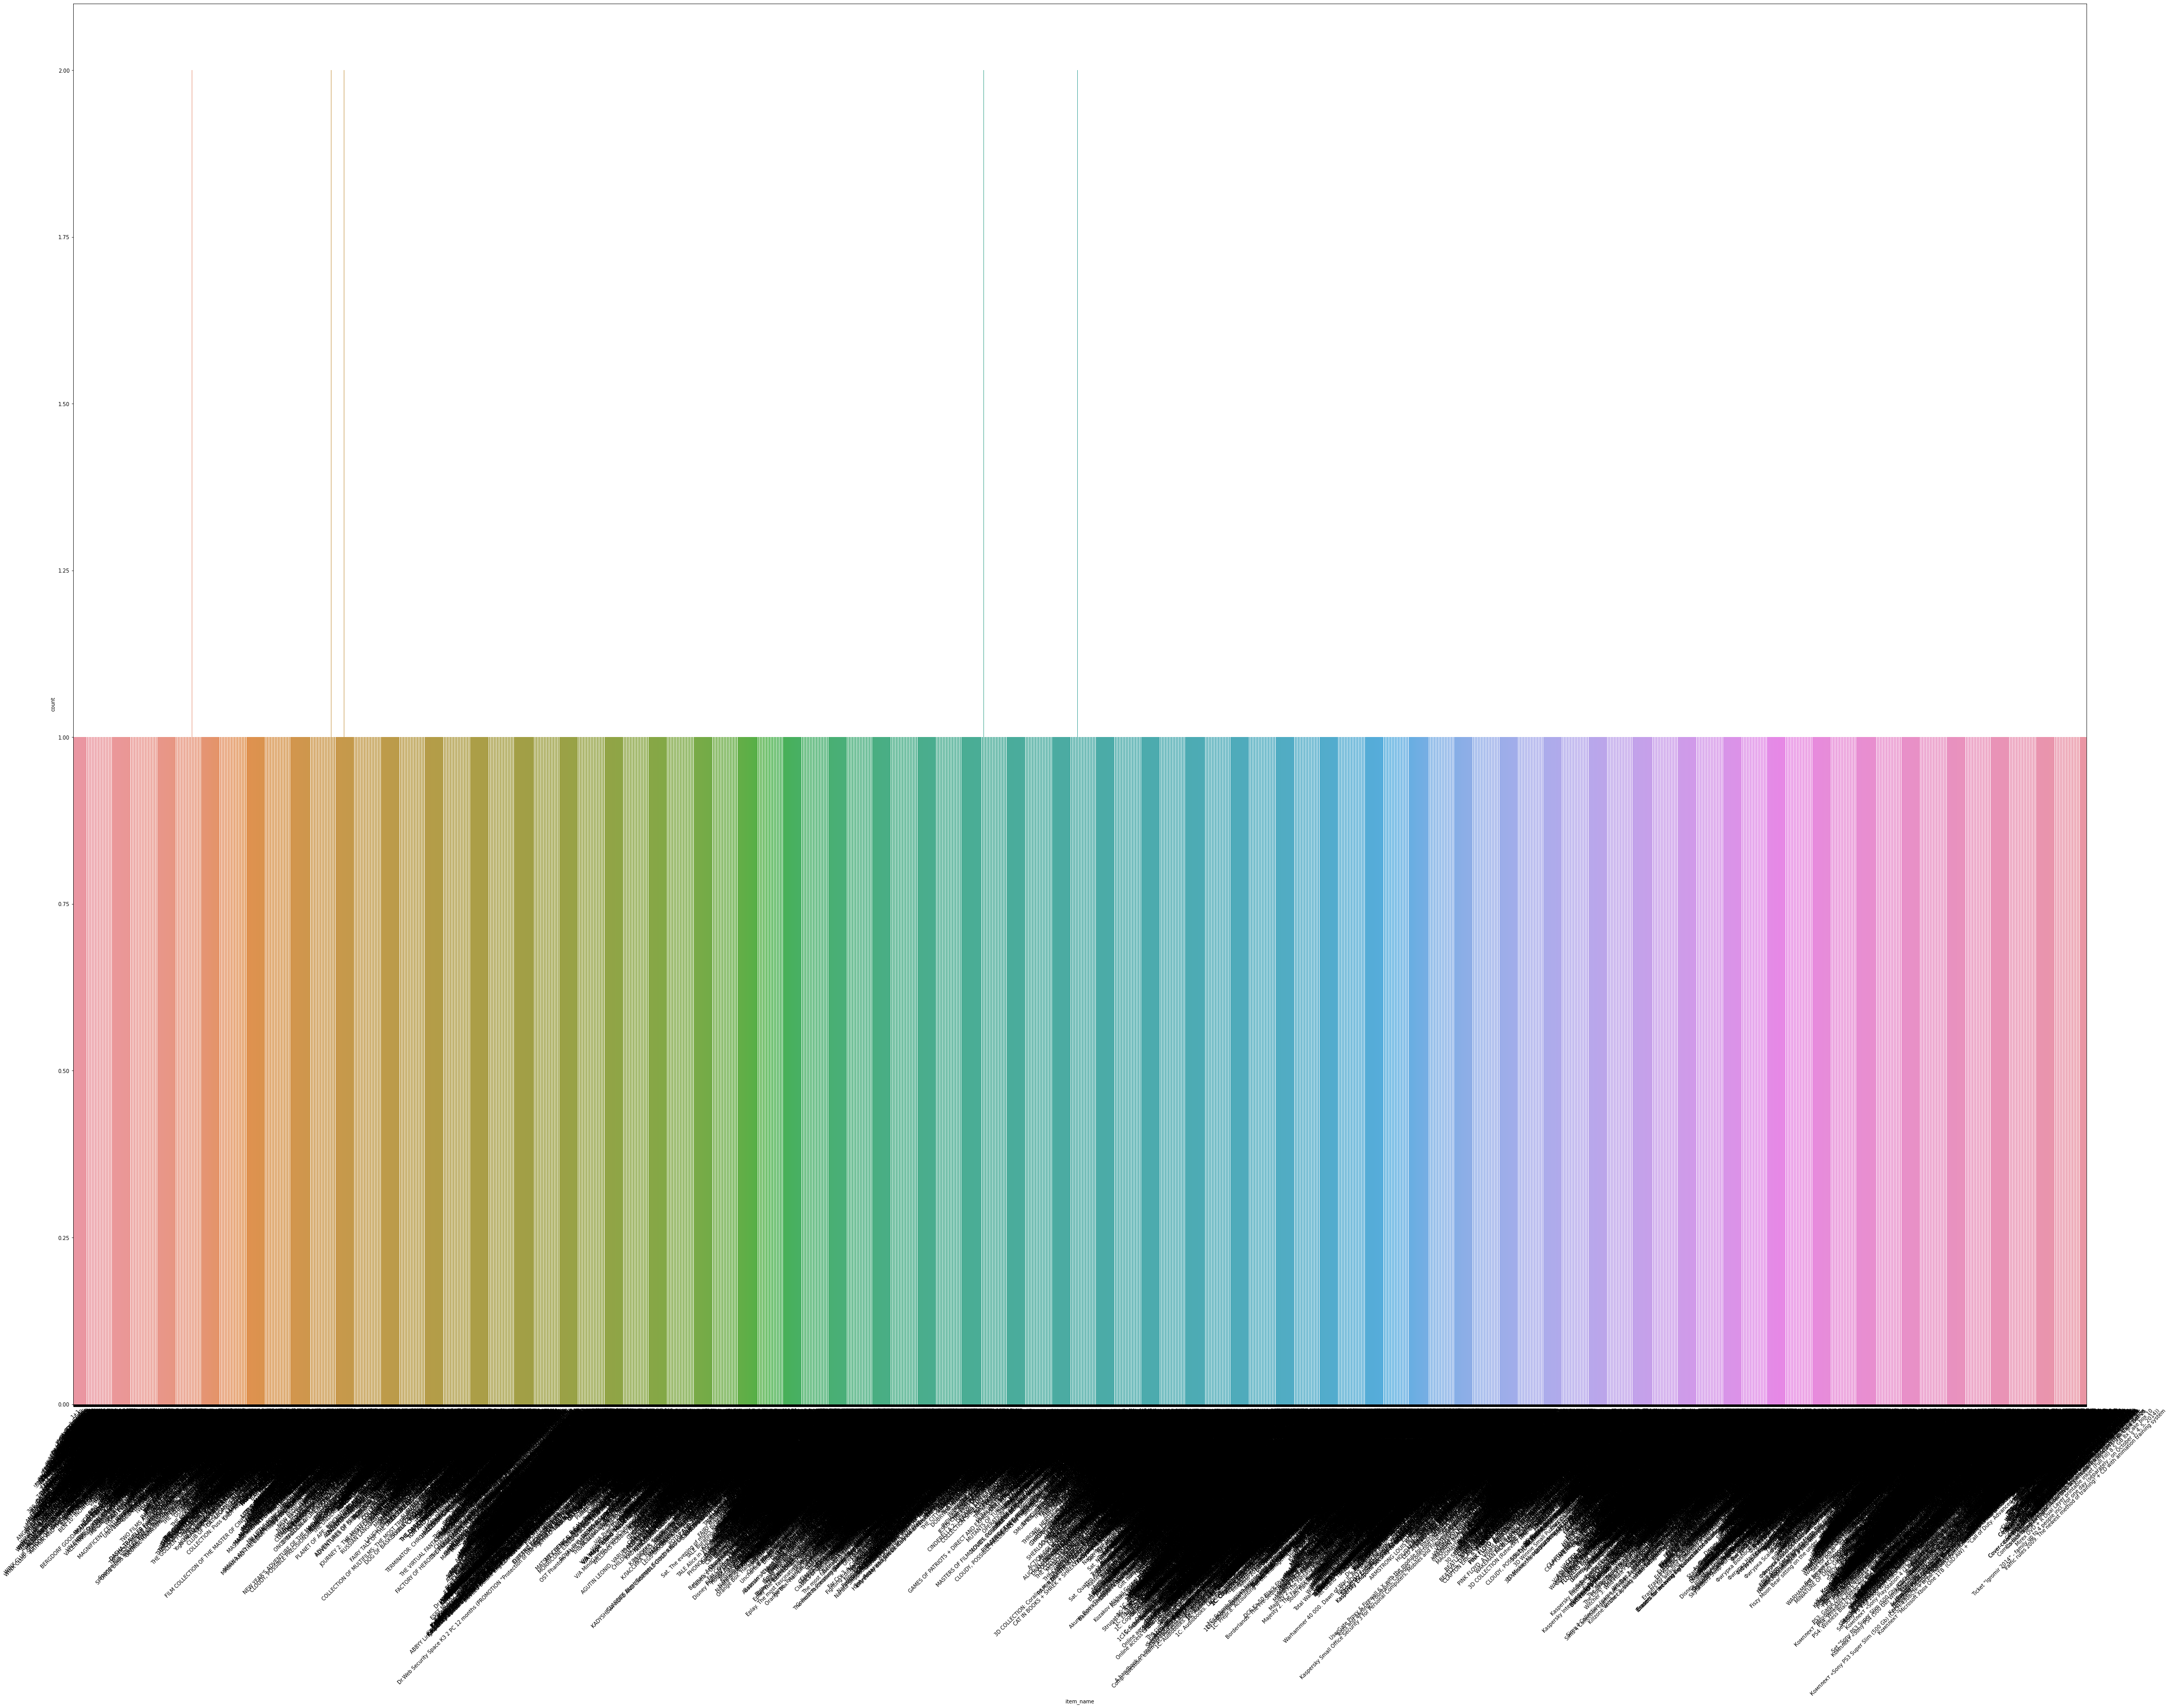

In [19]:
import seaborn as sns
plt.figure(figsize = ( 70 , 50))
sns.countplot(mergeddata['item_name'])
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83]),
 <a list of 84 Text major ticklabel objects>)

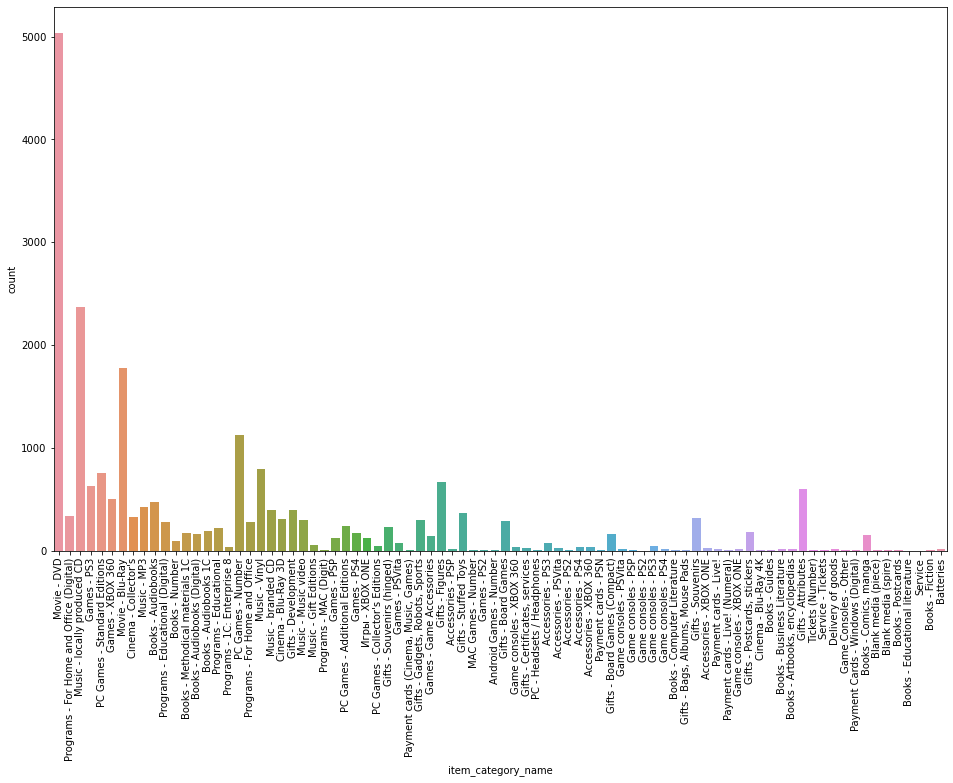

In [20]:
plt.figure(figsize = (16 , 10))
sns.countplot(mergeddata['item_category_name'])
plt.xticks(rotation=90)

In [21]:
shops.head()

,shop_id,shop_name
0,0,"Yakutsk Ordzhonikidze, 56 francs"
1,1,"Yakutsk TC ""Central"" franc"
2,2,"Adygea Shopping Center ""Mega"""
3,3,"Balashikha TRK ""October-Kinomir"""
4,4,"Volzhsky shopping center ""Volga Mall"""


In [22]:
sales_train .head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [23]:
sales = pd.read_csv("../input/competitive-data-science-predict-future-sales/sales_train.csv")

In [24]:
sales

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


Transform dates

In [25]:
#convert the drae field to pandas date time

sales.loc[:,('date')]=pd.to_datetime(sales.loc[:,('date')],format='%d.%m.%Y')

In [26]:
# add year,date,time

sales['year']=sales['date'].dt.year
sales['month']=sales['date'].dt.month
sales['day']=sales['date'].dt.day

In [27]:
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,day
0,2013-01-02,0,59,22154,999.00,1.0,2013,1,2
1,2013-01-03,0,25,2552,899.00,1.0,2013,1,3
2,2013-01-05,0,25,2552,899.00,-1.0,2013,1,5
3,2013-01-06,0,25,2554,1709.05,1.0,2013,1,6
4,2013-01-15,0,25,2555,1099.00,1.0,2013,1,15


In [28]:
sales['year_month']=sales['date'].map(lambda x:100*x.year+x.month)

In [29]:
sales['day_of_week']=sales['date'].map(lambda x: x.weekday())

In [30]:
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,day,year_month,day_of_week
0,2013-01-02,0,59,22154,999.00,1.0,2013,1,2,201301,2
1,2013-01-03,0,25,2552,899.00,1.0,2013,1,3,201301,3
2,2013-01-05,0,25,2552,899.00,-1.0,2013,1,5,201301,5
3,2013-01-06,0,25,2554,1709.05,1.0,2013,1,6,201301,6
4,2013-01-15,0,25,2555,1099.00,1.0,2013,1,15,201301,1


In [31]:
#sort values in dataframe ,order the col,reset the index
sales=sales.sort_values(by=['date','shop_id','item_id'],ascending=[True,True,True])

sales.head()


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,day,year_month,day_of_week
32569,2013-01-01,0,2,991,99.0,1.0,2013,1,1,201301,1
32552,2013-01-01,0,2,1472,2599.0,1.0,2013,1,1,201301,1
32632,2013-01-01,0,2,1905,249.0,1.0,2013,1,1,201301,1
32459,2013-01-01,0,2,2920,599.0,2.0,2013,1,1,201301,1
32504,2013-01-01,0,2,3320,1999.0,1.0,2013,1,1,201301,1


In [32]:
sales.reset_index(inplace=True)
sales.head()

,index,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,day,year_month,day_of_week
0,32569,2013-01-01,0,2,991,99.0,1.0,2013,1,1,201301,1
1,32552,2013-01-01,0,2,1472,2599.0,1.0,2013,1,1,201301,1
2,32632,2013-01-01,0,2,1905,249.0,1.0,2013,1,1,201301,1
3,32459,2013-01-01,0,2,2920,599.0,2.0,2013,1,1,201301,1
4,32504,2013-01-01,0,2,3320,1999.0,1.0,2013,1,1,201301,1


In [33]:
sales=sales.rename(columns={"index":"numbers"})

In [34]:
del sales['numbers']
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,day,year_month,day_of_week
0,2013-01-01,0,2,991,99.0,1.0,2013,1,1,201301,1
1,2013-01-01,0,2,1472,2599.0,1.0,2013,1,1,201301,1
2,2013-01-01,0,2,1905,249.0,1.0,2013,1,1,201301,1
3,2013-01-01,0,2,2920,599.0,2.0,2013,1,1,201301,1
4,2013-01-01,0,2,3320,1999.0,1.0,2013,1,1,201301,1


Time series

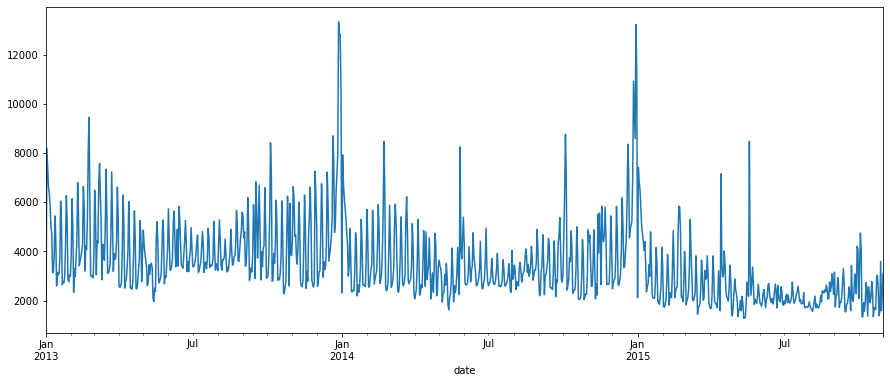

In [35]:
daily_count_sum=sales.groupby('date')['item_cnt_day'].sum()
daily_count_sum.plot(figsize=(15,6))

In [36]:
#weekely cycles occur because weekend sales are higher
count_by_day=pd.DataFrame(sales.groupby('day_of_week')['item_cnt_day'].sum())
count_by_day.reset_index(inplace=True)
#wekdays,weekends
count_by_day_we=count_by_day.loc[count_by_day['day_of_week']>=5]
count_by_day_wd=count_by_day.loc[count_by_day['day_of_week']<5]
#graph
objects=('Mon','Tues','Wed','Thu','Fri','Sat','Sun')
objects_wd=('Mon','Tues','Wed','Thu','Fri')
objects_we=('Sat','Sun')



([<matplotlib.axis.XTick at 0x7f3ac8c1a410>,
 [Text(0, 0, 'Mon'),
  Text(0, 0, 'Tues'),
  Text(0, 0, 'Wed'),
  Text(0, 0, 'Thu'),
  Text(0, 0, 'Fri'),
  Text(0, 0, 'Sat'),
  Text(0, 0, 'Sun')])

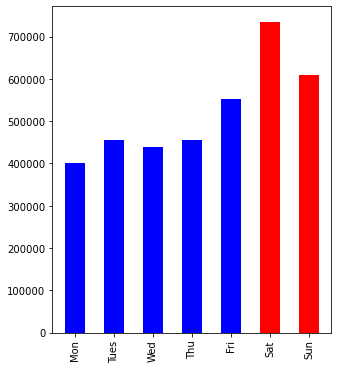

In [37]:
x_pos = np.arange(len(objects))
x_pos_wd=np.arange(len(objects_wd))
x_pos_we=(5,6)

plt.figure(figsize=(5,6))
width=0.5

rects_wd=plt.bar(x_pos_wd,count_by_day_wd.item_cnt_day,width,color='b')

rects_we=plt.bar(x_pos_we,count_by_day_we.item_cnt_day,width,color='r')

plt.xticks(x_pos,objects,rotation=90)

In [38]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Headsets / Headphones,0
1,Accessories - PS2,1
2,Accessories - PS3,2
3,Accessories - PS4,3
4,Accessories - PSP,4


eda for items ,categories and shops

In [39]:
sales=pd.merge(sales,items,how='left',on='item_id',copy=False)
sales=sales.merge(item_categories,how='left',on='item_category_id',copy=False)
sales=sales.merge(shops,how='left',on='shop_id',copy=False)

In [40]:
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,day,year_month,day_of_week,item_category_id,item_name,item_category_name,shop_name
0,2013-01-01,0,2,991,99.0,1.0,2013,1,1,201301,1,67,"3D Action Puzzle ""Dinosaurs"" Tyrannosaurus",Gifts - Development,"Adygea Shopping Center ""Mega"""
1,2013-01-01,0,2,1472,2599.0,1.0,2013,1,1,201301,1,23,"Assassin's Creed 3 [Xbox 360, Russian version]",Games - XBOX 360,"Adygea Shopping Center ""Mega"""
2,2013-01-01,0,2,1905,249.0,1.0,2013,1,1,201301,1,30,"Bestseller. Grand Theft Auto: San Andreas [PC,...",PC Games - Standard Editions,"Adygea Shopping Center ""Mega"""
3,2013-01-01,0,2,2920,599.0,2.0,2013,1,1,201301,1,21,Disney. LEGO Pirates of the Caribbean (Essenti...,Games - PSP,"Adygea Shopping Center ""Mega"""
4,2013-01-01,0,2,3320,1999.0,1.0,2013,1,1,201301,1,19,"FIFA 13 (with PS Move support) [PS3, Russian v...",Games - PS3,"Adygea Shopping Center ""Mega"""


In [41]:
sales.loc[sales['item_cnt_day']==sales['item_cnt_day'].max()]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,day,year_month,day_of_week,item_category_id,item_name,item_category_name,shop_name
2928870,2015-10-28,33,12,11373,0.908714,2169.0,2015,10,28,201510,2,9,Delivery to the point of issue (Boxberry),Delivery of goods,Online shop Emergency


In [42]:
item_category_count_sums=pd.DataFrame(sales.groupby(['item_category_name'])['item_cnt_day'].sum())

item_category_count_sums=item_category_count_sums.reset_index()

In [43]:
iccs_sort=item_category_count_sums.sort_values(by='item_cnt_day',ascending=False)
iccs_sort.reset_index(inplace=True)
iccs_sort =iccs_sort.rename(columns={"index":"numbers"})
del iccs_sort['numbers']
iccs_sort.head()

,item_category_name,item_cnt_day
0,Movie - DVD,634171.0
1,PC Games - Standard Editions,456540.0
2,Music - locally produced CD,348591.0
3,Games - PS3,254887.0
4,Movie - Blu-Ray,203284.0


Text(0.5, 1.0, 'Units sold,item category')

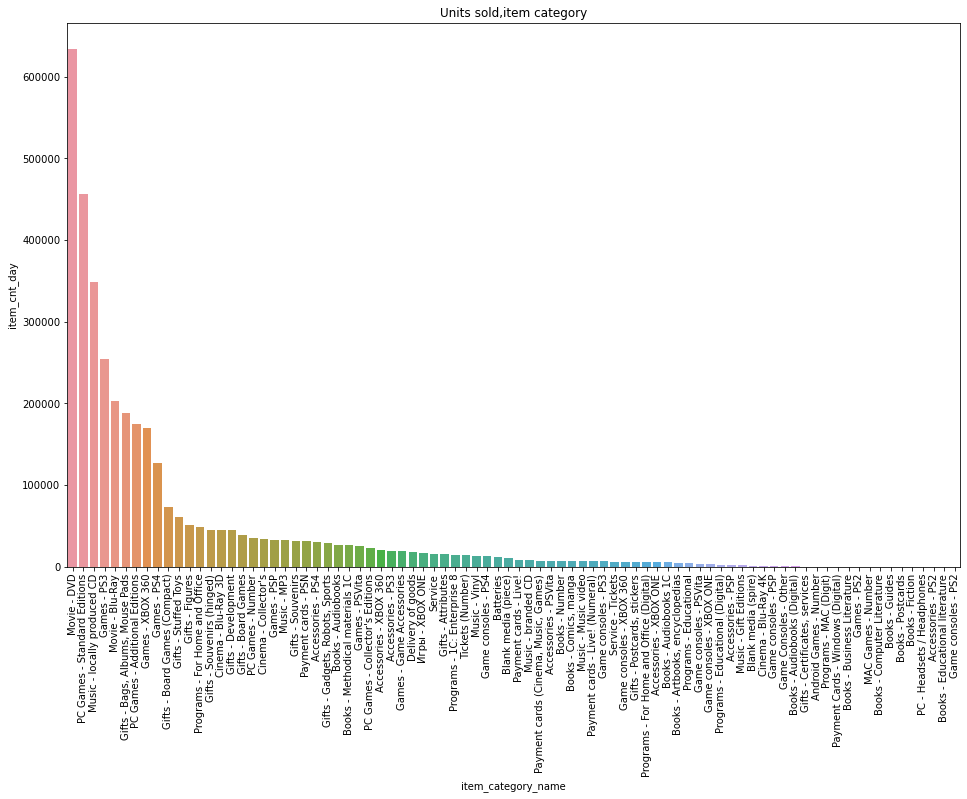

In [44]:
plt.figure(figsize=(16,10))
sns.barplot(x='item_category_name',y='item_cnt_day',data=item_category_count_sums,order=iccs_sort.item_category_name)
plt.xticks(rotation=90)
plt.title('Units sold,item category')

In [45]:
shop_count_sums=pd.DataFrame(sales.groupby(['shop_name'])['item_cnt_day'].sum())
shop_count_sums=shop_count_sums.reset_index()
shop_count_sums.head()

,shop_name,item_cnt_day
0,"Adygea Shopping Center ""Mega""",30620.0
1,"Balashikha TRK ""October-Kinomir""",28355.0
2,"Chekhov SEC ""Carnival""",78079.0
3,"Colosseum ""Rio""",61633.0
4,Digital warehouse 1C-Online,63388.0


In [46]:
scs_sort=shop_count_sums.sort_values(by='item_cnt_day',ascending=False)
scs_sort.reset_index(inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59]),
 <a list of 60 Text major ticklabel objects>)

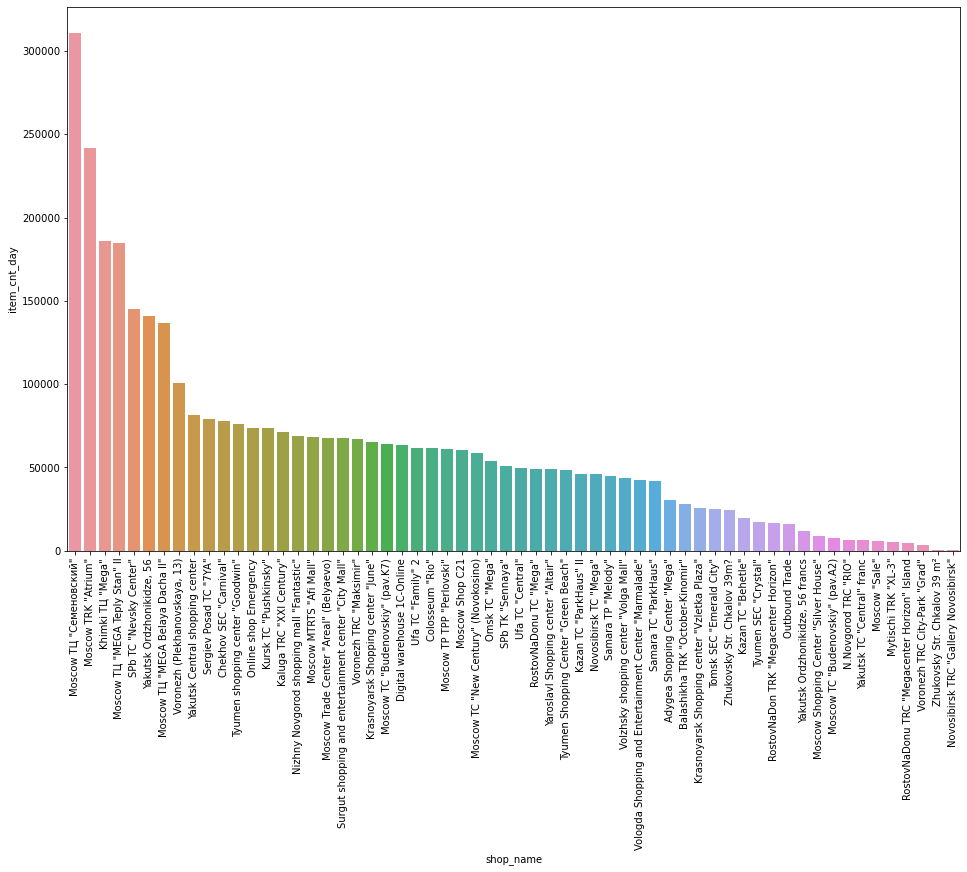

In [47]:
plt.figure(figsize=(16,10))
sns.barplot(x='shop_name',y='item_cnt_day',data=shop_count_sums,order=scs_sort.shop_name)
plt.xticks(rotation=90)


remove outlier

In [48]:
#sales shape
sales.shape

(2935849, 15)

Prepare the data for lstm model

In [49]:
sales_monthly=sales.pivot_table(index=['shop_id','item_id'],values=['item_cnt_day'],columns=['date_block_num'],fill_value=0,aggfunc='sum' )

In [50]:
sales_monthly.reset_index(inplace=True)
sales_monthly.head()


shop_id item_id item_cnt_day                        ...        \
date_block_num                            0   1  2  3  4  5  6  7  ... 24 25   
0                    0      30            0  31  0  0  0  0  0  0  ...  0  0   
1                    0      31            0  11  0  0  0  0  0  0  ...  0  0   
2                    0      32            6  10  0  0  0  0  0  0  ...  0  0   
3                    0      33            3   3  0  0  0  0  0  0  ...  0  0   
4                    0      35            1  14  0  0  0  0  0  0  ...  0  0   

                                        
date_block_num 26 27 28 29 30 31 32 33  
0               0  0  0  0  0  0  0  0  
1               0  0  0  0  0  0  0  0  
2               0  0  0  0  0  0  0  0  
3               0  0  0  0  0  0  0  0  
4               0  0  0  0  0  0  0  0  

[5 rows x 36 columns]

In [51]:
sales_monthly=pd.merge(test,sales_monthly,on=['shop_id','item_id'],how='left')
sales_monthly.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,ID,shop_id,item_id,"(item_cnt_day, 0)","(item_cnt_day, 1)","(item_cnt_day, 2)","(item_cnt_day, 3)","(item_cnt_day, 4)","(item_cnt_day, 5)","(item_cnt_day, 6)",...,"(item_cnt_day, 24)","(item_cnt_day, 25)","(item_cnt_day, 26)","(item_cnt_day, 27)","(item_cnt_day, 28)","(item_cnt_day, 29)","(item_cnt_day, 30)","(item_cnt_day, 31)","(item_cnt_day, 32)","(item_cnt_day, 33)"
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
sales_monthly.fillna(0,inplace=True)


In [53]:
x_train=np.expand_dims(sales_monthly.values[:,:-1],axis=2)
x_train.shape

(214200, 36, 1)

In [54]:
y_train=sales_monthly.values[:,-1:]
y_train.shape

(214200, 1)

In [55]:
#test
x_test=np.expand_dims(sales_monthly.values[:,1:],axis=2)
x_test.shape

(214200, 36, 1)

In [56]:
y_test=sales_monthly.values[:,-1:]
y_test.shape

(214200, 1)

Model train

In [57]:
import math
import matplotlib.pyplot as plt

In [58]:
def plot_train_curve(history):
    colors =['#66101','#fdb863']
    accuracy=rmse(history.history['mean_squared_error'])
    epochs=range(len(accuracy))
    with plt.style.context('ggplot'):
        plt.figure(figsize=(8,8/1.618))
        plt.ticklabel_format(useOffset=False)
        plt.plot(epochs,accuracy,marker='o',c=colors[0],label='Training RMSE')
        
        axes=plt.gca()
        plt.title('Training RMSE')
        plt.legend()
        plt.show()

LSTM MODEL

In [59]:
from keras.models import Sequential
from keras.layers import LSTM,Dense
from keras.models import load_model,Model

lstm_model_1=Sequential()
lstm_model_1.add(LSTM(units=64,input_shape=(33,1),activation='relu'))
lstm_model_1.add(Dense(1))
lstm_model_1.compile(loss='mse',optimizer='adam',metrics=['mean_squared_error'])
lstm_model_1.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                16896     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [60]:
lstm_model_1_history=lstm_model_1.fit(x_train,y_train,batch_size=4096,epochs=20)

Epoch 1/20
53/53 [==============================] - 3s 66ms/step - loss: 6016667.0000 - mean_squared_error: 6016667.0000
Epoch 2/20
53/53 [==============================] - 4s 66ms/step - loss: 762295.0000 - mean_squared_error: 762295.0000
Epoch 3/20
53/53 [==============================] - 4s 71ms/step - loss: 1286298.0000 - mean_squared_error: 1286298.0000
Epoch 4/20
53/53 [==============================] - 4s 74ms/step - loss: 1296511.5000 - mean_squared_error: 1296511.5000
Epoch 5/20
53/53 [==============================] - 4s 73ms/step - loss: 689629.5000 - mean_squared_error: 689629.5000
Epoch 6/20
53/53 [==============================] - 4s 70ms/step - loss: 197331.0781 - mean_squared_error: 197331.0781
Epoch 7/20
53/53 [==============================] - 3s 64ms/step - loss: 148725.1719 - mean_squared_error: 148725.1719
Epoch 8/20
53/53 [==============================] - 4s 73ms/step - loss: 189233.1406 - mean_squared_error: 189233.1406
Epoch 9/20
53/53 [========================

In [61]:
plot_train_curve(lstm_model_1_history)

NameError: name 'rmse' is not defined